In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train_ps1 = pd.read_csv("train.csv")
test_ps1 = pd.read_csv("test.csv")

In [7]:
train_ps1.head(10)
train_ps1.start_date.dtype

dtype('int64')

In [6]:
test_ps1.head(10)

,portfolio_id,desk_id,office_id,pf_category,start_date,sold,country_code,euribor_rate,currency,libor_rate,bought,creation_date,indicator_code,sell_date,type,hedge_value,status
0,PF00001001,DSK00001001,OFF00001001,A,20040720,171831000.0,T,0.02074,USD,2.332216,1.715337e+08,20040720,NaN,20040812,A,NaN,NaN
1,PF00001004,DSK00001003,OFF00001002,B,20040723,56485000.0,T,0.02074,USD,2.332216,5.638038e+07,20040723,NaN,20040719,B,NaN,NaN
2,PF00001009,DSK00001007,OFF00001001,A,20040607,41734000.0,T,0.02074,USD,2.332216,4.166179e+07,20040726,NaN,20040709,A,NaN,NaN
3,PF00001013,DSK00001011,OFF00001001,A,20040716,82951000.0,T,0.02074,USD,2.332216,8.250936e+07,20040726,NaN,20041019,A,NaN,NaN
4,PF00001014,DSK00001012,OFF00001001,A,20040713,73293000.0,T,0.02074,USD,2.332216,7.317055e+07,20040726,NaN,20040813,A,NaN,NaN
5,PF00001015,DSK00001013,OFF00001001,A,20040710,212553000.0,T,0.02074,USD,2.332216,2.114103e+08,20040727,NaN,20041013,A,NaN,NaN
6,PF00001017,DSK00001015,OFF00001001,A,20040804,72831000.0,T,0.02075,USD,2.181960,7.270110e+07,20040804,NaN,20040816,A,NaN,NaN
7,PF00001023,DSK00001019,OFF00001001,A,20040712,44088000.0,T,0.02075,USD,2.181960,4.400673e+07,20040809,NaN,20040816,A,NaN,NaN
8,PF00001024,DSK00001020,OFF00001001,A,20040810,80234000.0,T,0.02075,USD,2.181960,7.978402e+07,20040810,NaN,20041116,A,NaN,NaN
9,PF00001025,DSK00001021,OFF00001001,A,20040810,176748000.0,N,0.02075,GBP,5.024006,1.760042e+08,20040810,NaN,20040913,C,NaN,NaN


In [8]:
#preprocessong
#encoding the required variables
encoding_req = ['portfolio_id','desk_id','office_id','pf_category','country_code','currency','type']
encoding_req


['portfolio_id',
 'desk_id',
 'office_id',
 'pf_category',
 'country_code',
 'currency',
 'type']

In [36]:
train_ps1.desk_id.value_counts()

5301    3665
4769      10
4637      10
4523       9
4494       9
4712       9
4488       9
4663       9
4557       8
4497       8
4672       8
4788       8
4699       7
4451       7
4762       7
4578       7
4368       7
4524       7
4271       7
4704       7
4369       7
4509       7
4485       7
4784       7
4668       7
4424       7
4503       7
4571       7
4733       7
3289       7
        ... 
3917       1
1868       1
2036       1
2052       1
117        1
5          1
2164       1
4207       1
109        1
2156       1
2148       1
85         1
2132       1
77         1
2124       1
4167       1
2108       1
4151       1
53         1
4143       1
45         1
2092       1
4135       1
37         1
29         1
2076       1
21         1
2068       1
2060       1
0          1
Name: desk_id, Length: 3993, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()


In [10]:
train_ps1['desk_id'].fillna("null", inplace = True)
test_ps1['desk_id'].fillna("null", inplace = True)
train_ps1['indicator_code'].fillna(False, inplace = True)
train_ps1['status'].fillna(False, inplace = True)
train_ps1['hedge_value'].fillna(False, inplace = True)
test_ps1['indicator_code'].fillna(False, inplace = True)
test_ps1['status'].fillna(False, inplace = True)
test_ps1['hedge_value'].fillna(False, inplace = True)

In [11]:
train_ps1['balance'] = train_ps1.sold - train_ps1.bought
test_ps1['balance'] = test_ps1.sold - test_ps1.bought

In [12]:
train_ps1.libor_rate.fillna(train_ps1.libor_rate.mean(), inplace = True)
train_ps1.balance.fillna(train_ps1.balance.mean(), inplace=True)
test_ps1.libor_rate.fillna(test_ps1.libor_rate.mean(), inplace = True)
test_ps1.balance.fillna(test_ps1.balance.mean(), inplace=True)

In [13]:
for f in encoding_req:
    print(f)
    print(train_ps1[f].isnull().value_counts())

portfolio_id
False    9366
Name: portfolio_id, dtype: int64
desk_id
False    9366
Name: desk_id, dtype: int64
office_id
False    9366
Name: office_id, dtype: int64
pf_category
False    9366
Name: pf_category, dtype: int64
country_code
False    9366
Name: country_code, dtype: int64
currency
False    9366
Name: currency, dtype: int64
type
False    9366
Name: type, dtype: int64


In [14]:
for f in encoding_req:
    label_enc.fit(np.hstack([train_ps1[f], test_ps1[f]]))
    train_ps1[f] = pd.DataFrame(label_enc.transform(train_ps1[f]))
    test_ps1[f] = pd.DataFrame(label_enc.transform(test_ps1[f]))

In [90]:
for f in encoding_req:
    train_ps1[f] = train_ps1[f].astype(object)
    test_ps1[f] = test_ps1[f].astype(object)

In [95]:
test_ps1_demo.desk_id.dtype

dtype('O')

In [15]:
#separate the dates into datetime format
train_ps1['start_date_datetime'] = train_ps1['start_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))
train_ps1['creation_date_datetime'] = train_ps1['creation_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))
train_ps1['sell_date_datetime'] = train_ps1['sell_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))


In [16]:
#make the time difference table
train_ps1['train_ps1_start_sell'] = train_ps1['sell_date_datetime']-train_ps1['start_date_datetime']
train_ps1['train_ps1_start_creation'] = train_ps1['creation_date_datetime']-train_ps1['start_date_datetime']
train_ps1['train_ps1_creation_sell'] = train_ps1['sell_date_datetime']-train_ps1['creation_date_datetime']
train_ps1['train_ps1_start_sell'] = train_ps1['train_ps1_start_sell'].dt.days
train_ps1['train_ps1_start_creation'] = train_ps1['train_ps1_start_creation'].dt.days
train_ps1['train_ps1_creation_sell'] = train_ps1['train_ps1_creation_sell'].dt.days

In [17]:
test_ps1['start_date_datetime'] = test_ps1['start_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))
test_ps1['creation_date_datetime'] = test_ps1['creation_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))
test_ps1['sell_date_datetime'] = test_ps1['sell_date'].apply(lambda x: pd.to_datetime(str(x), format = '%Y%m%d'))


In [18]:
#make the time difference table
test_ps1['train_ps1_start_sell'] = test_ps1['sell_date_datetime']-test_ps1['start_date_datetime']
test_ps1['train_ps1_start_creation'] = test_ps1['creation_date_datetime']-test_ps1['start_date_datetime']
test_ps1['train_ps1_creation_sell'] = test_ps1['sell_date_datetime']-test_ps1['creation_date_datetime']
test_ps1['train_ps1_start_sell'] = test_ps1['train_ps1_start_sell'].dt.days
test_ps1['train_ps1_start_creation'] = test_ps1['train_ps1_start_creation'].dt.days
test_ps1['train_ps1_creation_sell'] = test_ps1['train_ps1_creation_sell'].dt.days

In [19]:
#creating y
y = pd.DataFrame(train_ps1['return'])

In [20]:
features = train_ps1.columns
features

Index(['portfolio_id', 'desk_id', 'office_id', 'pf_category', 'start_date',
       'sold', 'country_code', 'euribor_rate', 'currency', 'libor_rate',
       'bought', 'creation_date', 'indicator_code', 'sell_date', 'type',
       'hedge_value', 'status', 'return', 'balance', 'start_date_datetime',
       'creation_date_datetime', 'sell_date_datetime', 'train_ps1_start_sell',
       'train_ps1_start_creation', 'train_ps1_creation_sell'],
      dtype='object')

In [69]:
#min_max scale
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()

In [72]:
train_ps1['balance_minmax'] = min_max.fit_transform(train_ps1[['balance']])
test_ps1['balance_minmax'] = min_max.fit_transform(test_ps1[['balance']])

In [37]:
#selected features
feat = [ 'office_id', 'pf_category',
               'country_code', 'euribor_rate', 'currency', 'libor_rate',
                'indicator_code','type','hedge_value', 'status','train_ps1_start_sell',
               'train_ps1_start_creation', 'train_ps1_creation_sell','start_date','creation_date','sell_date',
        'balance']
feat

['office_id',
 'pf_category',
 'country_code',
 'euribor_rate',
 'currency',
 'libor_rate',
 'indicator_code',
 'type',
 'hedge_value',
 'status',
 'train_ps1_start_sell',
 'train_ps1_start_creation',
 'train_ps1_creation_sell',
 'start_date',
 'creation_date',
 'sell_date',
 'balance']

In [38]:
#applying rf regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

In [26]:
for f in feat:
    print(f)
    print(train_ps1[f].dtype)
    print(test_ps1[f].dtype)
    

desk_id
int64
int64
office_id
int64
int64
pf_category
int64
int64
country_code
int64
int64
euribor_rate
float64
float64
currency
int64
int64
libor_rate
float64
float64
indicator_code
bool
bool
type
int64
int64
hedge_value
bool
bool
status
bool
bool
train_ps1_start_sell
int64
int64
train_ps1_start_creation
int64
int64
train_ps1_creation_sell
int64
int64
start_date
int64
int64
creation_date
int64
int64
sell_date
int64
int64
balance
float64
float64


In [39]:
rf.fit(train_ps1[feat],y)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [92]:
#test_ps1.indicator_code = test_ps1.indicator_code.replace("null", False)
#test_ps1.hedge_value.fillna(False, inplace = True)
#test_ps1.status.fillna(False, inplace = True)


In [28]:
for f in feat:
    print(f)
    print(test_ps1[f].isnull().value_counts())

desk_id
False    4801
Name: desk_id, dtype: int64
office_id
False    4801
Name: office_id, dtype: int64
pf_category
False    4801
Name: pf_category, dtype: int64
country_code
False    4801
Name: country_code, dtype: int64
euribor_rate
False    4801
Name: euribor_rate, dtype: int64
currency
False    4801
Name: currency, dtype: int64
libor_rate
False    4801
Name: libor_rate, dtype: int64
indicator_code
False    4801
Name: indicator_code, dtype: int64
type
False    4801
Name: type, dtype: int64
hedge_value
False    4801
Name: hedge_value, dtype: int64
status
False    4801
Name: status, dtype: int64
train_ps1_start_sell
False    4801
Name: train_ps1_start_sell, dtype: int64
train_ps1_start_creation
False    4801
Name: train_ps1_start_creation, dtype: int64
train_ps1_creation_sell
False    4801
Name: train_ps1_creation_sell, dtype: int64
start_date
False    4801
Name: start_date, dtype: int64
creation_date
False    4801
Name: creation_date, dtype: int64
sell_date
False    4801
Name: sell_d

In [40]:
#prediction
prediction = rf.predict(test_ps1[feat])
prediction

array([ 0.025247  ,  0.02849   ,  0.0252599 , ...,  0.00616756,
        0.00554235,  0.00591998])

In [30]:
test_ps1_demo = pd.read_csv("test.csv")

In [41]:
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})

In [42]:
submissions.to_csv('results_rf_last2.csv',index=False)

The above solution gave a accuracy of 58%
shitty performance

In [33]:
train_ps1[feat].shape[1]

18

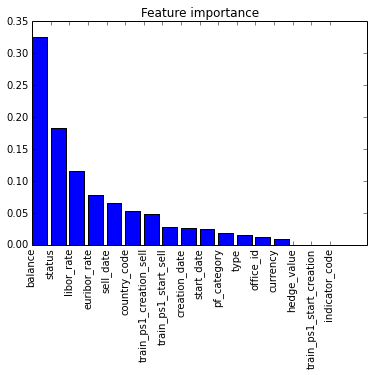

In [43]:
#making variable importance
importance = rf.feature_importances_
indices = np.argsort(importance)[::-1]
names = [train_ps1[feat].columns[i] for i in indices]
plt.figure()
plt.title('Feature importance')
plt.bar(range(train_ps1[feat].shape[1]),importance[indices])
plt.xticks(range(train_ps1[feat].shape[1]), names,rotation = 90)
plt.show()


In [49]:
corr_matrix = train_ps1[feat].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop

['country_code',
 'currency',
 'libor_rate',
 'type',
 'train_ps1_creation_sell',
 'start_date',
 'creation_date',
 'sell_date']

In [50]:
feat_corr_filter = [ 'office_id', 'pf_category',
                'euribor_rate', 'currency',
                'indicator_code','hedge_value', 'status','train_ps1_start_sell',
               'train_ps1_start_creation',
        'balance']

In [51]:
rf_corr_filter = RandomForestRegressor(random_state=0)
rf_corr_filter.fit(train_ps1[feat_corr_filter],y)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [52]:
prediction = rf_corr_filter.predict(test_ps1[feat_corr_filter])
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})
submissions.to_csv('results_rf_last_corr.csv', index=False)

In [140]:
#now we will proccede with the rf variable selection
from sklearn.feature_selection import SelectFromModel


In [141]:
for f in zip(feat, rf.feature_importances_):
    print(f)

('portfolio_id', 0.08347598898237002)
('desk_id', 0.079735729010081066)
('office_id', 5.0902375524247801e-05)
('pf_category', 0.0067339026474971756)
('country_code', 0.028027657659616838)
('euribor_rate', 0.0676626192681518)
('currency', 0.0061900957847403548)
('libor_rate', 0.22568873076234444)
('indicator_code', 1.6243763522028494e-06)
('type', 0.016077429984358408)
('hedge_value', 3.1353160405950089e-06)
('status', 0.41388805691297587)
('train_ps1_start_sell', 0.0063943404389999615)
('train_ps1_start_creation', 0.00025479984212948279)
('train_ps1_creation_sell', 0.0050954583978705939)
('balance', 0.060719528240946952)


In [151]:
#put a threshold in the importances of
sfm = SelectFromModel(rf, threshold=0.01)
sfm.fit(train_ps1[feat],y)

/usr/local/lib/python3.4/dist-packages/sklearn/feature_selection/from_model.py:169: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.01)

In [152]:
for i in sfm.get_support(indices=True):
    print(feat[i])

portfolio_id
desk_id
country_code
euribor_rate
libor_rate
type
status
balance


In [153]:
sfm_train = sfm.transform(train_ps1[feat])
sfm_test = sfm.transform(test_ps1[feat])

In [154]:
rf_imp = RandomForestRegressor(random_state=0)
rf_imp.fit(sfm_train,y)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [155]:
prediction = rf_imp.predict(sfm_test)
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})
submissions.to_csv('results_rf_imp.csv', index=False)

The above rf imp model performed very poor
Thus its better to consider the collinear model


In [53]:
#using gbmlight
import lightgbm as gbm
import xgboost as xgb

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [54]:
params = {
    'task': 'train',
    #'boosting_type': 'gbdt',
    'objective': 'regression',
    #'metric': {'l2', 'auc'},
    #'num_leaves': 31,
    #'learning_rate': 0.05,
    #'feature_fraction': 0.9,
    #'bagging_fraction': 0.8,
    #'bagging_freq': 5,
    #'verbose': 0
}

In [58]:
y = train_ps1['return'].values

In [59]:
gbm_train = gbm.Dataset(train_ps1[feat_corr_filter],y)

In [60]:
gbm_model = gbm.train(params,gbm_train)

In [63]:
prediction = gbm_model.predict(test_ps1[feat])
prediction

array([ 0.04346423,  0.04048141,  0.04346423, ...,  0.03620811,
        0.00269733,  0.00269733])

In [64]:
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})
submissions.to_csv('results_lightgbm_last.csv', index=False)

In [58]:
y = train_ps1['return'].values
y


array([ 0.02496,  0.05496,  0.02496, ...,  0.006  ,  0.006  ,  0.006  ])

In [64]:
#using xgb
xgb_model = xgb.XGBRegressor().fit(train_ps1[feat],y)

In [65]:
prediction = xgb_model.predict(test_ps1[feat])

In [66]:
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})
submissions.to_csv('results_xgbboost.csv', index=False)

performing the gradient boosting tuning


In [118]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

In [119]:
#defing the function to evaluate the models
def model_fit(algo, train_data, predictors, performCV=True, printfeatimp = True, cv_folds =5):
    #fit the algorithm with data
    algo.fit(train_data[predictors], train_data['return'])
    
    #preditions
    train_data_predictions = algo.predict(train_data[predictors])
    #algo.predict_proba(train_data[predictors])   -- for classifaction jobs
    
    #performing cv
    if(performCV):
        cv_score = cross_validation.cross_val_score(algo,train_data[predictors], train_data['return'],cv = cv_folds,scoring='r2')
                                                   
        
    #printing the models result
    print("/n mOdel rePort")
    #print("Accuracy : %.4g"%metrics.accuracy_score(train_data[predictors].values, train_data_predictions))
    print("R2 score %f"%metrics.r2_score(train_data['return'], train_data_predictions))
    
    if(performCV):
        print("CV score : mean %.7g | std %.7g | min %.7g | max %.7g | "%(np.mean(cv_score),np.std(cv_score),np.min(cv_score), np.max(cv_score)))
                                                                         
        
    if(printfeatimp):
        feat_importance = pd.Series(algo.feature_importances_, predictors).sort_values(ascending=False)
        feat_importance.plot(kind="bar", title = "faeture importance")
        plt.ylabel('feature importance score')
    

In [ ]:
#function for cv 
def cv_validation_lgb(dataset, param, cv_folds=5):
    lgb_model=lgb.train(dataset,param)
    lgb_predict_train =lgb_model.predict(train_ps1[feat])
    
    #performing cv
    

In [121]:
#base model for lighgbm
import lightgbm as lgb

In [135]:
param={
    'task':'train',
    'objective':'regression'  
}
lgbtrain = lgb.Dataset(train_ps1[feat],y)

In [134]:
y = train_ps1['return'].values

In [136]:
lgb0 = lgb.train(param,lgbtrain)

/n mOdel rePort
R2 score 0.917451
CV score : mean 0.4519002 | std 0.6073815 | min -0.674125 | max 0.9522262 | 


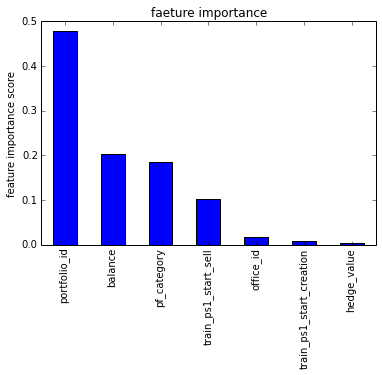

In [61]:
#base model
gbm0 = GradientBoostingRegressor(random_state=10)
model_fit(gbm0,train_ps1, feat_corr_filter)

In [64]:
#using grid search to find the optimal no. of learnign rate
param_test1 = {'n_estimators':(20,30,40,50,60,70,80,90,100)}
gsearch1 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.15, min_samples_split=400, min_samples_leaf=50, max_depth=9, max_features='sqrt',subsample=0.8, random_state=10),
                       param_grid=param_test1, scoring = 'r2', n_jobs=4,iid=False,cv=5)
gsearch1.fit(train_ps1[feat_corr_filter], train_ps1['return'])

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.15, loss='ls', max_depth=9,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=400,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=10, subsample=0.8, verbose=0,
             warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': (20, 30, 40, 50, 60, 70, 80, 90, 100)},
       pre_dispatch='2*n_jobs', refit=True, scoring='r2', verbose=0)

In [65]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.42316, std: 0.50918, params: {'n_estimators': 20},
  mean: 0.42619, std: 0.54103, params: {'n_estimators': 30},
  mean: 0.42920, std: 0.56380, params: {'n_estimators': 40},
  mean: 0.42348, std: 0.58061, params: {'n_estimators': 50},
  mean: 0.43075, std: 0.58729, params: {'n_estimators': 60},
  mean: 0.43315, std: 0.59365, params: {'n_estimators': 70},
  mean: 0.43135, std: 0.60081, params: {'n_estimators': 80},
  mean: 0.43613, std: 0.60255, params: {'n_estimators': 90},
  mean: 0.43475, std: 0.60654, params: {'n_estimators': 100}],
 {'n_estimators': 90},
 0.4361322182644116)

In [66]:
#parametere testing 2
param_test2 = {'max_depth':np.arange(5,16,2,dtype=int),'min_samples_split':np.arange(200,1000,200,dtype=int)}
gsearch2 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.15, n_estimators=90, 
                                                            max_features='sqrt',subsample=0.8, random_state=10),
                       param_grid=param_test2, scoring = 'r2', n_jobs=4,iid=False,cv=5)
gsearch2.fit(train_ps1[feat_corr_filter], train_ps1['return'])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.43042, std: 0.63733, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.42627, std: 0.65238, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.42983, std: 0.61779, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.41824, std: 0.60606, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.37743, std: 0.72496, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.45652, std: 0.59596, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.46904, std: 0.59270, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.44806, std: 0.59107, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.38190, std: 0.70823, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.44840, std: 0.62540, params: {'max_depth': 9, 'min_samples_split': 400},
  mean: 0.47110, std: 0.55585, params: {'max_depth': 9, 'min_samples_split': 600},
  mean: 0.46649, std: 0.61329, params: {'max_depth': 9, 'min_samples_split': 800},
  me

In [69]:
param_test3 = {'min_samples_leaf':np.arange(5,71,5)}
gsearch3 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.15, n_estimators=90,max_depth=9, 
                                                            min_samples_split=600, 
                                                            max_features='sqrt',subsample=0.8, random_state=10),
                       param_grid=param_test3, scoring = 'r2', n_jobs=4,iid=False,cv=5)
gsearch3.fit(train_ps1[feat_corr_filter], train_ps1['return'])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.44456, std: 0.60133, params: {'min_samples_leaf': 5},
  mean: 0.46604, std: 0.60141, params: {'min_samples_leaf': 10},
  mean: 0.44957, std: 0.62261, params: {'min_samples_leaf': 15},
  mean: 0.44915, std: 0.62965, params: {'min_samples_leaf': 20},
  mean: 0.44830, std: 0.62491, params: {'min_samples_leaf': 25},
  mean: 0.44528, std: 0.62196, params: {'min_samples_leaf': 30},
  mean: 0.43687, std: 0.63911, params: {'min_samples_leaf': 35},
  mean: 0.43820, std: 0.62305, params: {'min_samples_leaf': 40},
  mean: 0.44085, std: 0.61592, params: {'min_samples_leaf': 45},
  mean: 0.42784, std: 0.61562, params: {'min_samples_leaf': 50},
  mean: 0.42478, std: 0.61453, params: {'min_samples_leaf': 55},
  mean: 0.43286, std: 0.60942, params: {'min_samples_leaf': 60},
  mean: 0.42597, std: 0.61800, params: {'min_samples_leaf': 65},
  mean: 0.43376, std: 0.59583, params: {'min_samples_leaf': 70}],
 {'min_samples_leaf': 10},
 0.46603684780288557)

/n mOdel rePort
R2 score 0.832847
CV score : mean 0.5016404 | std 0.5655519 | min -0.5452555 | max 0.9645974 | 


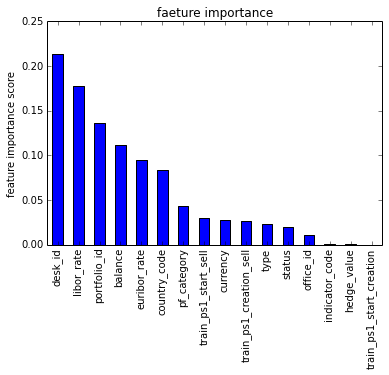

In [45]:
model_fit(gsearch3.best_estimator_,train_ps1, feat)

In [71]:
param_test4 = {'max_features':np.arange(3,17,1)}
gsearch4 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.05, n_estimators=90,max_depth=9, 
                                                            min_samples_split=600,min_samples_leaf = 10 ,
                                                            max_features='sqrt',subsample=0.8, random_state=10),
                       param_grid=param_test4, scoring = 'r2', n_jobs=4,iid=False,cv=5)
gsearch4.fit(train_ps1[feat], train_ps1['return'])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.52564, std: 0.53786, params: {'max_features': 3},
  mean: 0.51474, std: 0.56432, params: {'max_features': 4},
  mean: 0.50798, std: 0.57676, params: {'max_features': 5},
  mean: 0.49689, std: 0.61321, params: {'max_features': 6},
  mean: 0.49677, std: 0.61766, params: {'max_features': 7},
  mean: 0.49755, std: 0.61291, params: {'max_features': 8},
  mean: 0.47946, std: 0.62115, params: {'max_features': 9},
  mean: 0.48267, std: 0.62053, params: {'max_features': 10},
  mean: 0.47942, std: 0.61961, params: {'max_features': 11},
  mean: 0.47877, std: 0.62065, params: {'max_features': 12},
  mean: 0.47583, std: 0.62330, params: {'max_features': 13},
  mean: 0.47596, std: 0.61710, params: {'max_features': 14},
  mean: 0.47011, std: 0.62515, params: {'max_features': 15},
  mean: 0.47453, std: 0.61043, params: {'max_features': 16}],
 {'max_features': 3},
 0.5256362635616101)

'max_features': 6
max_depth=9
min_samples_split=400

In [54]:
param_test5 = {'subsample':np.arange(0.4,0.9,0.05)}
gsearch5 = GridSearchCV(estimator=GradientBoostingRegressor(learning_rate=0.05,min_samples_leaf=40, n_estimators=90,max_depth=9, min_samples_split=400, 
                                                            max_features=6, random_state=10),
                       param_grid=param_test5, scoring = 'r2', n_jobs=4,iid=False,cv=5)
gsearch5.fit(train_ps1[feat], train_ps1['return'])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.44518, std: 0.60691, params: {'subsample': 0.40000000000000002},
  mean: 0.46179, std: 0.59657, params: {'subsample': 0.45000000000000001},
  mean: 0.45090, std: 0.61614, params: {'subsample': 0.5},
  mean: 0.46059, std: 0.62570, params: {'subsample': 0.55000000000000004},
  mean: 0.47270, std: 0.61047, params: {'subsample': 0.59999999999999998},
  mean: 0.47218, std: 0.62775, params: {'subsample': 0.64999999999999991},
  mean: 0.47225, std: 0.62522, params: {'subsample': 0.69999999999999996},
  mean: 0.46593, std: 0.64555, params: {'subsample': 0.75},
  mean: 0.49079, std: 0.60531, params: {'subsample': 0.79999999999999993},
  mean: 0.48141, std: 0.62293, params: {'subsample': 0.84999999999999987}],
 {'subsample': 0.79999999999999993},
 0.49078978842855714)

/n mOdel rePort
R2 score 0.829673
CV score : mean 0.4907898 | std 0.6053077 | min -0.6467595 | max 0.9643035 | 


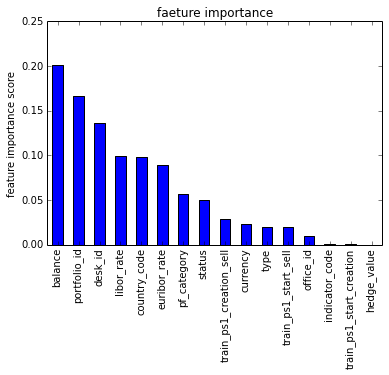

In [55]:
model_fit(gsearch5.best_estimator_,train_ps1, feat)

/n mOdel rePort
R2 score 0.844818
CV score : mean 0.4811581 | std 0.6412896 | min -0.7335906 | max 0.9660895 | 


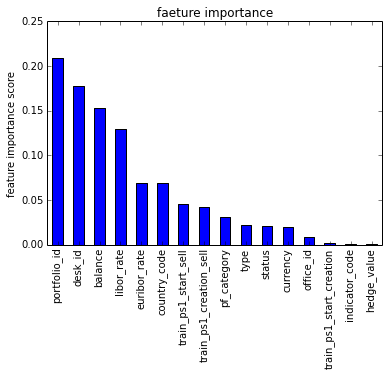

In [72]:
gbm_tuned1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=90,max_depth=9,min_samples_split=400,
                                      min_samples_leaf=40,subsample=0.8,random_state=10, max_features =6 )
model_fit(gbm_tuned1,train_ps1,feat)

In [73]:
prediction = gbm_tuned1.predict(test_ps1[feat])
submissions = pd.DataFrame({'portfolio_id':test_ps1_demo.portfolio_id, 'return':prediction})
submissions.to_csv('results_gbm_tuned1.csv', index=False)

In [58]:
test_ps1_demo = pd.read_csv("test.csv")

In [74]:
#using light gbm for parameter tuning


In [80]:
#train test split
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_ps1[feat],train_ps1['return'],test_size = 0.25, 
                                                 random_state=10)

In [83]:
train_ps1.shape

(9366, 25)

In [84]:
train_ps1_demo = pd.read_csv("train.csv")

In [87]:
train_ps1_demo.desk_id.isnull().value_counts()


False    5701
True     3665
Name: desk_id, dtype: int64

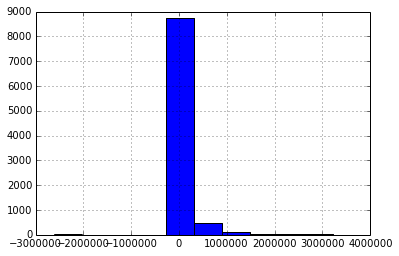

In [88]:
train_ps1.balance.hist()

(array([  2.00000000e+00,   1.10000000e+01,   4.10000000e+01,
          9.26700000e+03,   1.70000000e+01,   1.30000000e+01,
          7.00000000e+00,   3.00000000e+00,   4.00000000e+00,
          1.00000000e+00]),
 array([ -68.,  -47.,  -26.,   -5.,   16.,   37.,   58.,   79.,  100.,
         121.,  142.]),
 <a list of 10 Patch objects>)

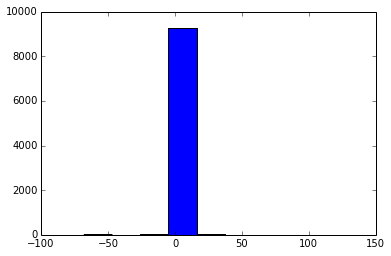

In [109]:
plt.hist(train_ps1.train_ps1_start_creation)

In [110]:
import seaborn as sns

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


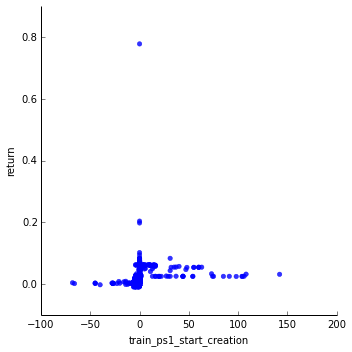

In [117]:
sns.lmplot(x = 'train_ps1_start_creation', y = 'return',data=train_ps1,fit_reg=False)